# Setting up your `python` environment

We will be using `python 3` and `ipython`/`jupyter` extensively in this course. You need to set up the correct `python` environment first. Below are some instructions in a Mac OS X 10.11 environment. You should be able to adapt it to other environments -- try Google if any problem.  

## Installing `anaconda` and `jupyter`

1. Download and install the `anaconda` installation package (for `python 3.6`) at https://www.continuum.io/downloads
2. Create a `py36` virtual environment by `conda create -n py36 python=3.6 anaconda`. See more at http://conda.pydata.org/docs/using/envs.html
3. Activiate `py36` (or put it on your `~/.bashrc`): `source activate py36`
4. To install a new package in an environment, switch to it and use `conda install -n PACKAGENAME` or `pip install PACKAGENAME`
5. Install `jupyter` by `conda install jupyter`


### Test you installation

```
% python -V
Python 3.6.3 :: Anaconda ...
% ipython -V
6.1.0
% jupyter notebook
```


The last command shall open up a new page in your browser. Also check if you click the "new" button, there is a "python 3" choice under the 'notebooks'. 

## Using `jupyter`

Start with simple tutorial: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html

Press `h` (you may need to press `ESC` first) to learn a few important keyboard shortcuts, e.g., 

* `SHIFT+RETURN`
* `A`, `B`, `X`
* `ESC`
* `ESC m`: to change the current cell to a `markdown` cell, 
* selecting multiple lines + `TAB` (indent them) / `Cmd + /` (block comment). 
* Note that mouse selection = copying to clipboard (sometimes annoying). 

Read the syntax of `markdown` at http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html and try it out by yourself. 

It also can display maths symbols/equations, e.g., $e^{ix} = cos(x) + i \cdot sin(x)$.

$$ P \implies Q  \qquad \equiv \qquad P \lor \neg Q $$

Try out cells with simple python code (or try the following cell in this notebook). 

**Tips**: 

* Recommended browser: firefox (Chrome has issues rendering maths fonts/equations)
* Your code may run into an infinite loop and you may HAVE TO kill the browser. So use a decent session manager for your browser. 

In [2]:
import random

n = 10
data = [random.randint(1, 10) for _ in range(n)]
data # this print out the variable's content

[1, 2, 9, 7, 8, 1, 10, 7, 8, 1]

In [3]:
import string
import sys
import urllib.request
from bs4 import BeautifulSoup
from pprint import pprint

def get_page(url):
    try :
        web_page = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(web_page, 'html.parser')
        return soup
    except urllib2.HTTPError :
        print("HTTPERROR!")
    except urllib2.URLError :
        print("URLERROR!")
        
def get_titles(sp):
    i = 1
    papers = sp.find_all('div', {'class' : 'data'})
    for paper in papers:
        title = paper.find('span', {'class' : 'title'} )
        print("Paper {}:\t{}".format(i, title.get_text()))
        i += 1
        

In [4]:
sp = get_page('http://dblp.uni-trier.de/pers/hd/m/Manning:Christopher_D=')

In [5]:
get_titles(sp) 

Paper 1:	Universal Dependency Parsing from Scratch.
Paper 2:	Simpler but More Accurate Semantic Dependency Parsing.
Paper 3:	Learning to Summarize Radiology Findings.
Paper 4:	Universal Dependency Parsing from Scratch.
Paper 5:	Textual Analogy Parsing: What's Shared and What's Compared among Analogous Facts.
Paper 6:	Semi-Supervised Sequence Modeling with Cross-View Training.
Paper 7:	Graph Convolution over Pruned Dependency Trees Improves Relation Extraction.
Paper 8:	HotpotQA: A Dataset for Diverse, Explainable Multi-hop Question Answering.
Paper 9:	Sentences with Gapping: Parsing and Reconstructing Elided Predicates.
Paper 10:	Compositional Attention Networks for Machine Reasoning.
Paper 11:	Sentences with Gapping: Parsing and Reconstructing Elided Predicates.
Paper 12:	Simpler but More Accurate Semantic Dependency Parsing.
Paper 13:	CoQA: A Conversational Question Answering Challenge.
Paper 14:	Textual Analogy Parsing: What's Shared and What's Compared among Analogous Facts.
Paper 

## Numpy

## Exercise

1. Compute the top-10 most frequently appearing words in the papers of the author. 

For Manning, the output should be: 

```
[('for', 74),
 ('and', 48),
 ('of', 37),
 ('Learning', 30),
 ('with', 25),
 ('the', 20),
 ('A', 20),
 ('to', 18),
 ('in', 15),
 ('Parsing', 13)]
```

You may even be able to use the `wordcloud` package to generate the word cloud: 


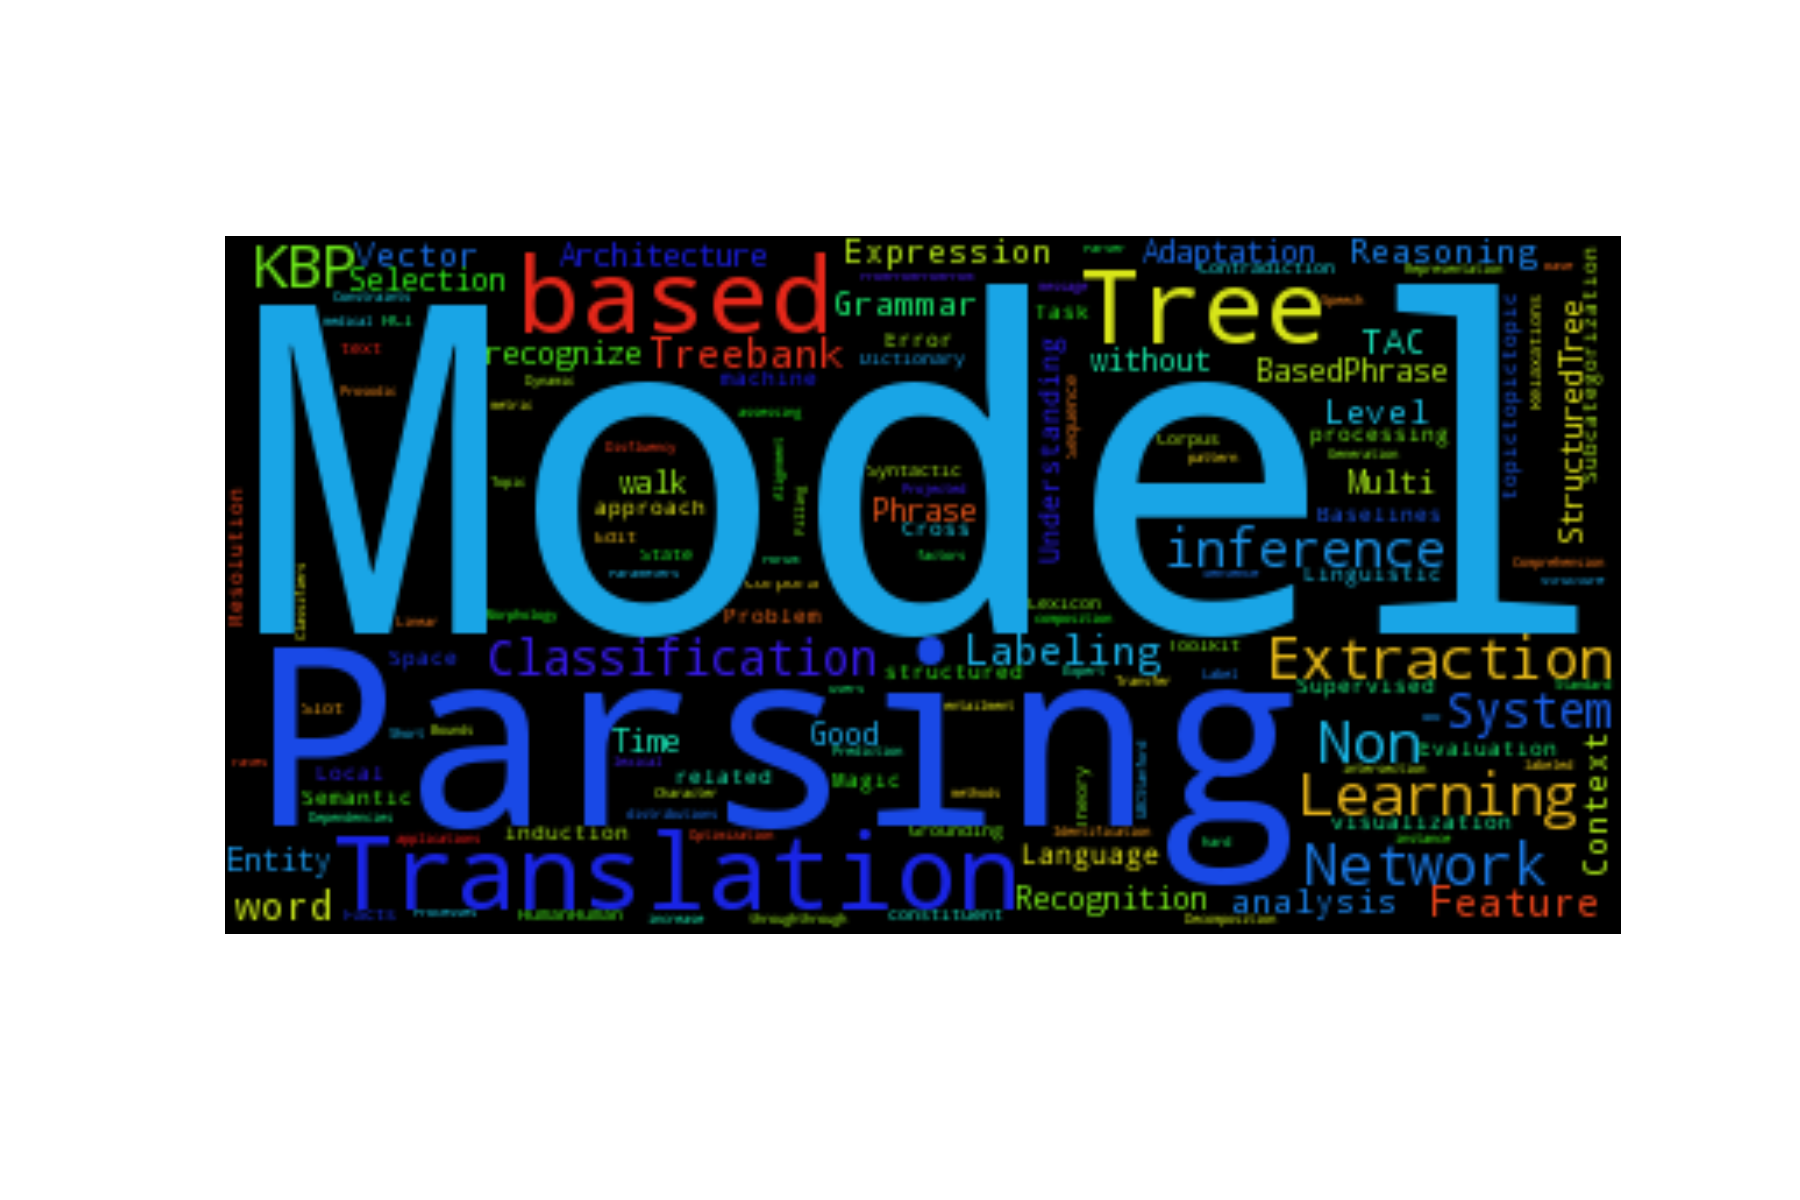

In [6]:
from IPython.display import Image
Image(filename="./asset/Christopher_Manning_wordcloud.png")

In [14]:
import numpy as np
from collections import Counter

def get_papers(sp):
    result = []
    i = 1
    papers = sp.find_all('div', {'class' : 'data'})
    for paper in papers:
        title = paper.find('span', {'class' : 'title'} )
        result.append(title.get_text())
        i += 1
    return result

papers = get_papers(sp)
words = []
for paper in papers:
    words.extend(paper.split())
words = [word.replace('.','') for word in words]
words = np.array(words)
counts = Counter(words)
counts.most_common(10)

[('for', 109),
 ('and', 63),
 ('of', 50),
 ('Learning', 46),
 ('with', 37),
 ('Parsing', 34),
 ('A', 33),
 ('the', 30),
 ('to', 26),
 ('in', 25)]